# Intro
Hello!
This is just a simple guide on how to run (any!) playground simulation locally. While you can abuse notebooks for their free computational resources, it might be nicer to code it in Jupyter or something else.

The only caveat: This assumes you already have Jupyter Notebook & basic knowledge of cmd 

Obviously, you could do this pretty quickly, but I'm just documenting my steps here so you won't have to do X amount of googling.
*Also, running the code in here will do nothing useful. The whole point is local, right?*

(This is for windows)

# Setting up a Virtual Environment 
**First**, we'll make a virtualenv.
You can use conda for this, but I've temporarily shied away from that because of a few problems I had.
Install it if you haven't yet on the cmd.
Skip to Installing Libraries & Finishing if you're already cool and did this before or don't want to make one.



In [ ]:
(cmd)
pip install virtualenv 

**Then, make your cmd go to wherever your project is stored.
In my case, I'm going my Hungry Goose folder.**

(A quick way to find it is to just make the files, then go to Hungry Goose (in my case), and click on the directory bar.
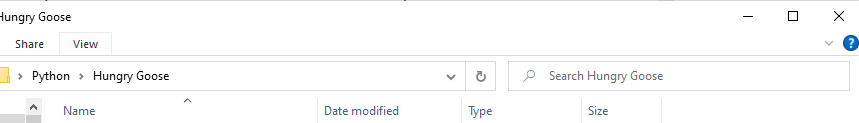
Clicking on that will get you something like 'C:\Users\X\Desktop\Python\Hungry Goose', but where ever your directory is.
*My terminology may be incorrect.*

**TIME TRAVELLER HERE:
IT'S A LOT BETTER NOT TO HAVE SPACES IN FOLDER NAMES. Make it Hungry_Goose, anything, BUT NO SPACES.** The issue is: Once you're in Jupyter, you can usually use pip or cmd commands in their code cells. But with a space in your directory, you'll get an issue saying it can't locate something or other. Happened for me, anyways. 

In [ ]:
(cmd)
cd C:\...\Desktop\Python\Hungry Goose
    

Then, you want to **create** a virtual environment. I'll put mine in the Hungry Goose directory, so staying on the same cmd (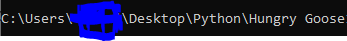) you then create one with:
You can call it whatever you want; we'll call it myenv.

In [ ]:
(cmd)
virtualenv myenv 

Now you should have a 'myenv' file in your Hungry Goose directory. Cool. Let's activate it in our cmd so we can actually install things into it.

In [ ]:
(cmd)
.\myenv\Scripts\activate
# The . basically states 'current directory'

Now there should be a fancy little thing that says (myenv) to the left of your directory on the cmd. You're in!
Now we do the actual useful things. Note: You can see what version of python the env is by typing 'python' in the cmd.
# Installing Libraries & Jupyter Notebook
Let's go ahead and install kaggle-environments (it's different to kaggle!)
You can go ahead and install numpy and others later on, just remember to activate the environment first (unless you wanna use the global).


*Why do we care about notebook?*
To render the games.
If we used something like vsc, when we want to render the module, it just returns '<IPython.core.display.HTML object>'. According to a source shown before, they only render on html or browser type things. So, we'll use Jupyter here.

In [ ]:
(cmd)
pip install kaggle-environments
pip install ipykernel 
python -m ipykernel install --name=myenv # This adds the environment to jupyter notebook's kernel list.

You can then open jupyter notebook after by just typing 'jupyter notebook' in the cmd.
Now you should be here:
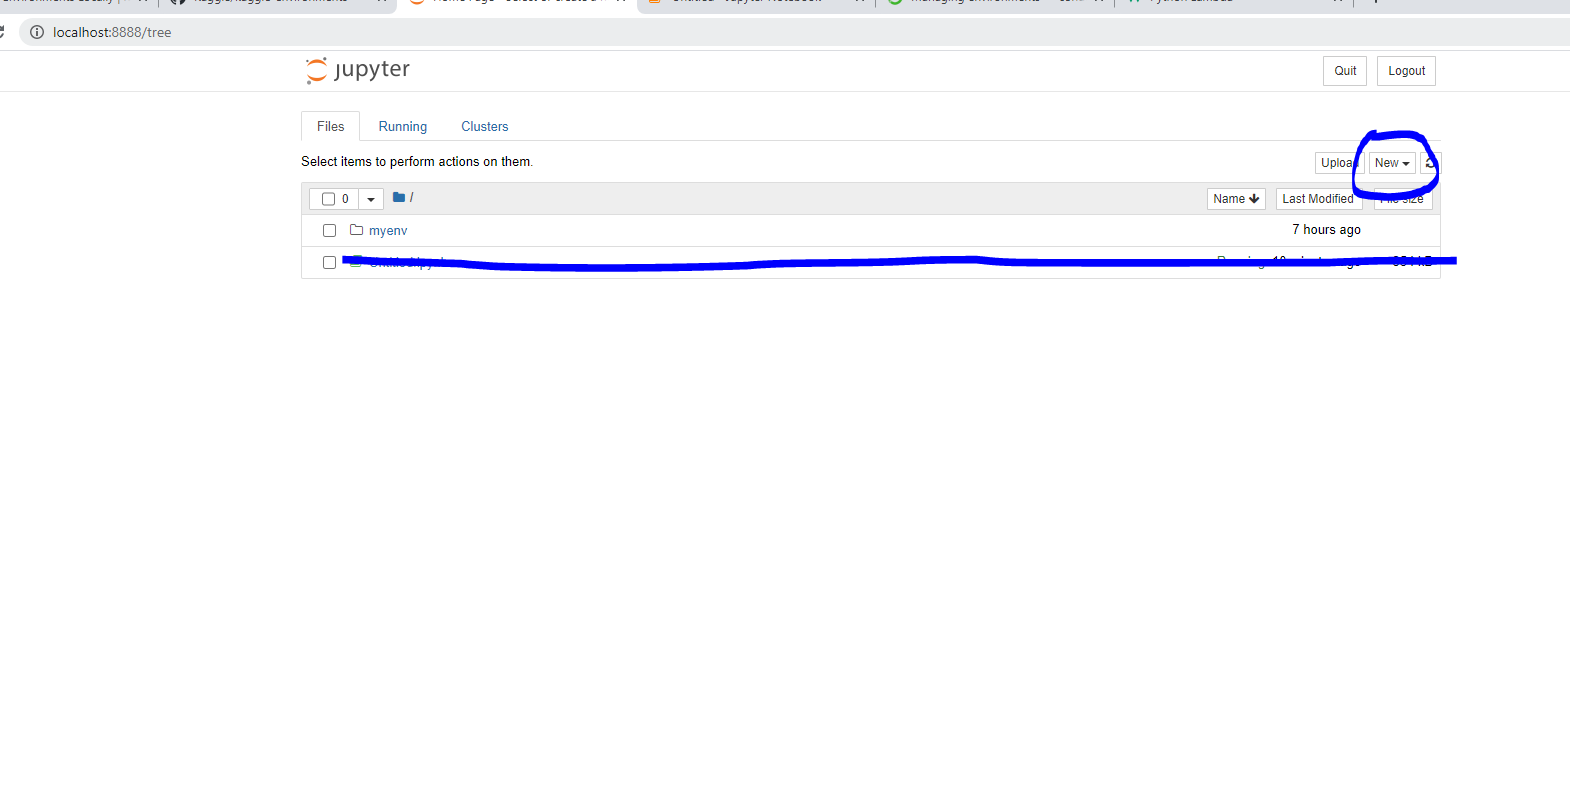
From here, it's as easy as creating a new notebook by clicking 'New' -> myenv, which makes the new notebook use that environment. You can change the environment a notebook uses by clicking on 'kernel' -> 'change kernel' in that notebook.


And now, it's as simple as putting your code in! Or writing markdown, whatever you want.
Here's some code to put in a code cell so you can check if it works.

In [ ]:
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils

#help(row_col)
#print(Configuration.columns)

# Agent
def agent(obs_dict, config_dict):
    """This agent always moves toward observation.food[0] but does not take advantage of board wrapping"""
    #print("Config dict", config_dict) # Config is static
    print("Observation dict", obs_dict) # This changes over each timestep (your observations change over time poggers)
    print(obs_dict['step']) # This and obs_dict.step are the exact same. No idea which one's better.
    
    observation = Observation(obs_dict) # -> Why is obs_dict wrapped in Observation? What does that do vs just obs_dict?
    print('ho', observation)
    
    configuration = Configuration(config_dict)
    player_index = observation.index
    player_goose = observation.geese[player_index]
    player_head = player_goose[0]
    player_row, player_column = row_col(player_head, configuration.columns)
    food = observation.food[0]
    food_row, food_column = row_col(food, configuration.columns)

    if food_row > player_row:
        return Action.SOUTH.name
    if food_row < player_row:
        return Action.NORTH.name
    if food_column > player_column:
        return Action.EAST.name
    return Action.WEST.name

###

# Setup a hungry_geese environment and run agent vs a random.
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
env.run([agent, agent,agent,agent])
env.render(mode="ipython", width=500, height=450)

You might get an issue saying 'no module about requests'. The fix is as easy as pip installing it (pip install requests) into your venv.

Tada, everything is nice now!
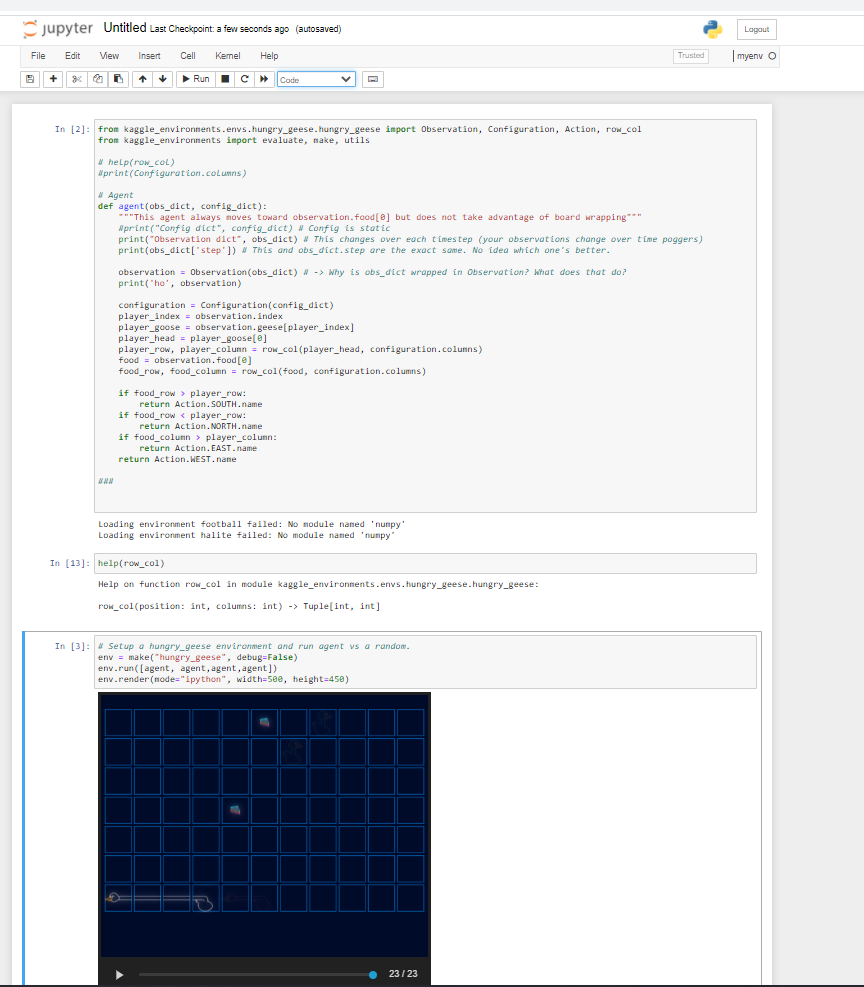


If you have any improvements on this, please comment! This is by no means exhaustive and I'm probably wrong somewhere.
Given that you've read all the way down here, I hope you got something useful out of this.

Bye!


Some links I used to make this:
https://www.kaggle.com/c/hungry-geese/discussion/218888 # Ant comes in clutch.

https://mothergeo-py.readthedocs.io/en/latest/development/how-to/venv-win.html#:~:text=If%20you%20try%20to%20run,can%20install%20it%20using%20pip.&text=virtualenv.exe%20will%20likely%20now,directory%20under%20the%20Scripts%20subdirectory.

https://janakiev.com/blog/jupyter-virtual-envs/

https://queirozf.com/entries/jupyter-kernels-how-to-add-change-remove

https://stackoverflow.com/questions/57883361/how-to-display-ipython-core-display-html-object

